Intercept and Coefficient (Theta): [[4.15809376]
 [2.8204434 ]]


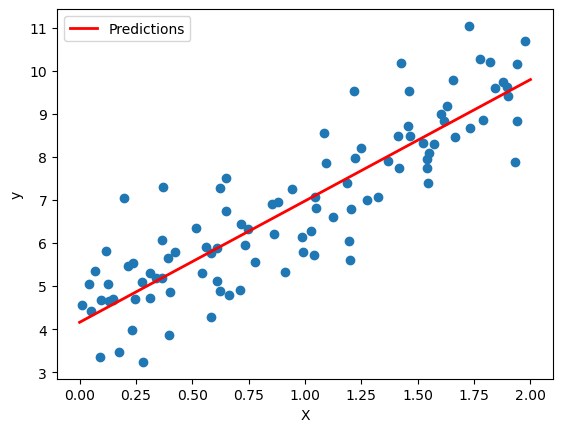

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Generate a simple dataset
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Add a bias term to X
X_b = np.c_[np.ones((100, 1)), X]

# Set learning rate and number of iterations
learning_rate = 0.01
n_iterations = 1000

# Initialize random values for the coefficients
theta = np.random.randn(2, 1)

# Gradient Descent
for iteration in range(n_iterations):
    gradients = 2/100 * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - learning_rate * gradients

# The resulting theta contains the coefficients
print("Intercept and Coefficient (Theta):", theta)

# Predictions using the learned parameters
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_predict = X_new_b.dot(theta)

# Plot the original data and the linear regression line
plt.scatter(X, y)
plt.plot(X_new, y_predict, "r-", linewidth=2, label="Predictions")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()


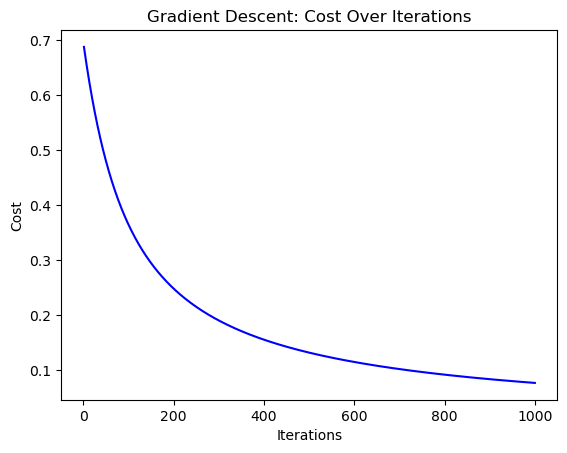

Accuracy on the test set: 100.00%


In [4]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data
y = (iris.target == 0).astype(int)  # Convert to binary classification (Iris Setosa or not)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Add bias term to features
X_train = np.c_[np.ones(X_train.shape[0]), X_train]
X_test = np.c_[np.ones(X_test.shape[0]), X_test]

# Initialize parameters
theta = np.zeros(X_train.shape[1])

# Define the sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Define the cost function (logistic loss)
def cost_function(X, y, theta):
    m = len(y)
    h = sigmoid(X @ theta)
    cost = -(1/m) * (y.T @ np.log(h) + (1 - y).T @ np.log(1 - h))
    return cost

# Define the gradient descent function
def gradient_descent(X, y, theta, learning_rate, num_iterations):
    m = len(y)
    costs = []
    
    for _ in range(num_iterations):
        h = sigmoid(X @ theta)
        gradient = (1/m) * X.T @ (h - y)
        theta -= learning_rate * gradient
        
        # Record the cost for visualization
        cost = cost_function(X, y, theta)
        costs.append(cost)
    
    return theta, costs

# Set hyperparameters
learning_rate = 0.01
num_iterations = 1000

# Run gradient descent
theta, costs = gradient_descent(X_train, y_train, theta, learning_rate, num_iterations)

# Plot the cost over iterations
plt.plot(range(1, num_iterations + 1), costs, color='blue')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Gradient Descent: Cost Over Iterations')
plt.show()

# Make predictions on the test set
predictions = (sigmoid(X_test @ theta) >= 0.5).astype(int)

# Calculate accuracy
accuracy = np.mean(predictions == y_test)
print(f"Accuracy on the test set: {accuracy:.2%}")
